In [65]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
from IPython.display import Audio
import csv
import os

# Which audio augmentation techniques will be used:
1. Time stretching - from 0.5 speed to 1.5 speed and then the audio will be croped to be of length 8e3 as before 
2. Pitch shifting - from n=-5 to n=5

In [58]:
sample_rate = 16000
label_strings = ["down", "go", "left", "no", "off", "on", "right", "stop", "up", "yes", "silence", "unknown"]
selected_labels = [1, 2, 6, 7, 10, 11]
selected_labels_dict = {x:i for i, x in enumerate(selected_labels)}
NUM_CLASSES = len(selected_labels)
commands = [label_strings[x] for x in selected_labels]
selected_labels_str = [label_strings[x] for x in selected_labels]
prediction_dict = {i: label for i, label in enumerate(selected_labels_str)}
prediction_dict_reversed = {label: i for i, label in enumerate(selected_labels_str)}

In [63]:
directory_path = "data/audio/8kHz_sampling/"
target_directory_path = "data/audio/8kHz_augmented/"
file_list = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

In [90]:
for file_name in file_list:
    print(file_name)
    with open(os.path.join(directory_path, file_name), 'r') as file:
        file_data = []
        reader = csv.DictReader(file)
        for row in reader:
            file_data.append(float(row['y']))  
            
        # Time stretching
        for i in range(5, 16):
            y_stretched = librosa.effects.time_stretch(np.array(file_data), rate=i/10)
            y_stretched = librosa.util.fix_length(y_stretched, size=8000)

            base, extenstion = file_name.split(".")
            new_filename = f"{base}_stretch={i/10:.1f}.{extenstion}"

            with open(os.path.join(target_directory_path, new_filename), "w") as wfile:
                wfile.writelines("index,y\n")
                for i, row in enumerate(y_stretched):
                    wfile.writelines(f"{i},{row}\n")
                wfile.close()
                    
        # Pitch shifting
        for i in range(5, 16):
            y_shifted = librosa.effects.pitch_shift(np.array(file_data), sr=8e3, n_steps=i-10)
            
            base, extenstion = file_name.split(".")
            new_filename = f"{base}_pitch={i-10}.{extenstion}"
            
            with open(os.path.join(target_directory_path, new_filename), "w") as wfile:
                wfile.writelines("index,y\n")
                for i, row in enumerate(y_shifted):
                    wfile.writelines(f"{i},{row}\n")
                    
                wfile.close()
        file.close()
            

stop_fs=8kHz_5.csv
left_fs=8kHz_2.csv
no_fs=8kHz_2.csv
unknown_fs=8kHz_11.csv
right_fs=8kHz_1.csv
go_fs=8kHz_2.csv
unknown_fs=8kHz_9.csv
go_fs=8kHz_1.csv
go_fs=8kHz_11.csv
right_fs=8kHz_8.csv
silence_fs=8kHz_6.csv
yes_fs=8kHz_8.csv
silence_fs=8kHz_10.csv
silence_fs=8kHz_2.csv
unknown_fs=8kHz_5.csv
yes_fs=8kHz_7.csv
right_fs=8kHz_5.csv
right_fs=8kHz_3.csv
silence_fs=8kHz_8.csv
yes_fs=8kHz_12.csv
right_fs=8kHz_7.csv
yes_fs=8kHz_2.csv
silence_fs=8kHz_5.csv
yes_fs=8kHz_1.csv
left_fs=8kHz_8.csv
right_fs=8kHz_6.csv
left_fs=8kHz_5.csv
yes_fs=8kHz_4.csv
stop_fs=8kHz_1.csv
yes_fs=8kHz_6.csv
stop_fs=8kHz.csv
silence_fs=8kHz_12.csv
unknown_fs=8kHz_10.csv
go_fs=8kHz_9.csv
left_fs=8kHz_4.csv
unknown_fs=8kHz_8.csv
stop_fs=8kHz_4.csv
go_fs=8kHz_4.csv
go_fs=8kHz_13.csv
silence_fs=8kHz_4.csv
no_fs=8kHz.csv
stop_fs=8kHz_11.csv
no_fs=8kHz_7.csv
right_fs=8kHz_2.csv
stop_fs=8kHz_2.csv
stop_fs=8kHz_8.csv
go_fs=8kHz_6.csv
unknown_fs=8kHz_3.csv
no_fs=8kHz_3.csv
left_fs=8kHz_9.csv
left_fs=8kHz_7.csv
silence_fs

In [119]:
noise = []
with open("data/audio/8kHz_augmented/silence_fs=8kHz_10_pitch=0.csv", 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        noise.append(float(row['y']))  # Convert to int if y is numeric

    file.close()

In [120]:
noise = np.array(noise, dtype=np.float32)

In [122]:
Audio(noise, rate=8000)

In [181]:
audio = []
with open("data/audio/8kHz_augmented/go_fs=8kHz_7_pitch=0.csv", 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        audio.append(float(row['y']))  # Convert to int if y is numeric

    file.close()
audio = np.array(audio, dtype=np.float32)

In [182]:
Audio(audio, rate=8000)

In [131]:
import noisereduce as nr

In [193]:
reduced_noise = nr.reduce_noise(y=audio, y_noise=noise, sr=8000, n_fft=1024, stationary=True)

In [194]:
reduced_noise2 = nr.reduce_noise(y=audio, y_noise=noise, sr=8000, n_fft=1024)

In [195]:
Audio(reduced_noise, rate=8000)

In [196]:
Audio(reduced_noise2, rate=8000)

In [134]:
from DSP_prototype.DSP_algorithms import stft

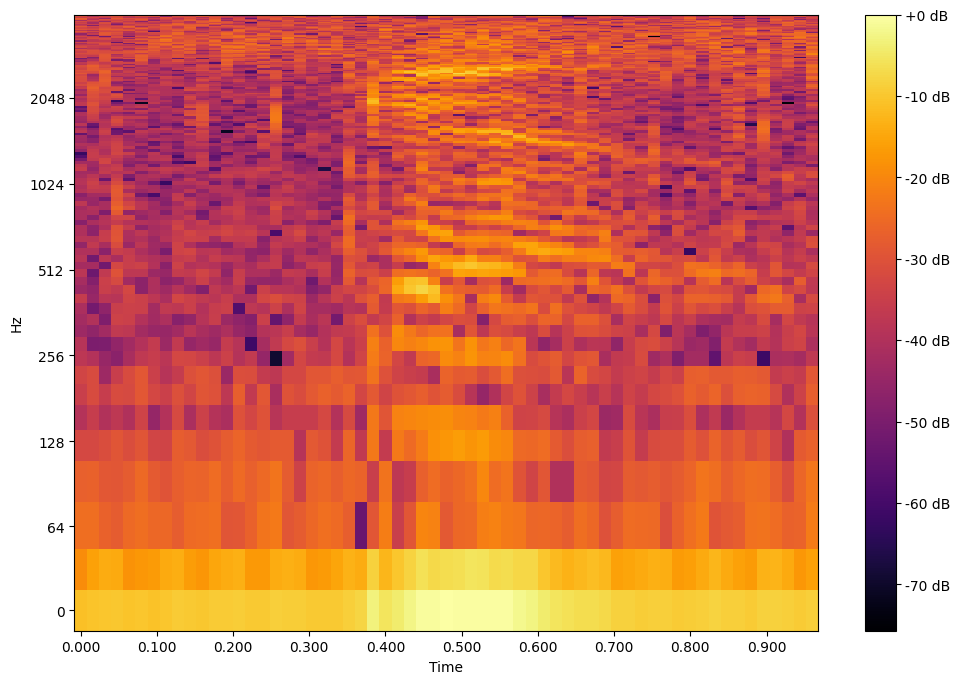

In [187]:
S_db = librosa.amplitude_to_db(np.abs(stft(audio, fs=8e3, N=256, hop_size=128)[0]), ref=np.max)
# Plot the spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db, x_axis='time', y_axis='log', sr=8e3, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

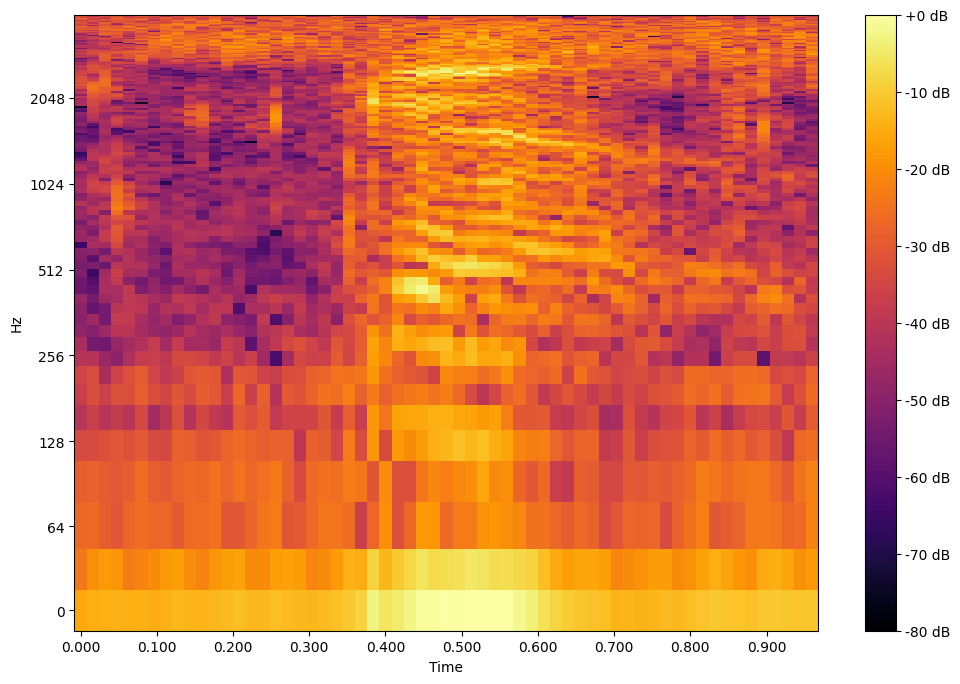

In [189]:
S_db = librosa.amplitude_to_db(np.abs(stft(reduced_noise2, fs=8e3, N=256, hop_size=128)[0]), ref=np.max)
# Plot the spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db, x_axis='time', y_axis='log', sr=8e3, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()